In [1]:
import numpy as np
import os
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import matplotlib
import matplotlib.pyplot as plt
font = {'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)


In [2]:
# This analysis is based on second batch prediction (104 sequences) results.
os.chdir('/home/bxie/PycharmProjects/KDEL/benchmark/building_new_model/95_training_database_predict_104batch/rnn_modular_package/predictions_results')

In [3]:
second_batch_exp_file = '/home/bxie/PycharmProjects/KDEL/benchmark/building_new_model/95_training_database_predict_104batch/raw_data/second_third_dataset_104_exp.txt'
experiment_dictionary = {} # key: sequence, value: Tg value
f = open(second_batch_exp_file,'r')
lines=f.read().split('\n')
f.close()
for line in lines:
    if line!='' and not 'tail' in line:
        experiment_dictionary[line.split()[0]]= float(line.split()[1])
        
def read_prediction_txt(txt_file):
    f = open(txt_file,'r')
    lines=f.read().split('\n')
    f.close()
    pre_dictionary = {}
    for line in lines:
        if line!='':
            pre_dictionary[line.split()[0]] = float(line.split()[1])
    return pre_dictionary

import glob
FNs = glob.glob('all_predict_checkpoints_*.txt')
original_data = {}
predict_data = {}
for FN in FNs:
    model_num = FN.split('_')[3]
    pre_dictionary = read_prediction_txt(FN)
    original_data['model'+model_num] = []
    predict_data['model'+model_num] = []
    for key in experiment_dictionary.keys():
        original_data['model'+model_num].append(experiment_dictionary[key])
        predict_data['model'+model_num].append(pre_dictionary[key])


In [4]:
def r2_np(x_values,y_values):
    correlation_matrix = np.corrcoef(x_values, y_values)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    return r_squared
def r_np(x_values,y_values):
    correlation_matrix = np.corrcoef(x_values, y_values)
    correlation_xy = correlation_matrix[0,1]
    return correlation_xy
def pearson(x_values,y_values):
    pearson_r = stats.pearsonr(x_values, y_values)
    return pearson_r
def spearman(x_values,y_values):
    spearman_r = stats.spearmanr(x_values, y_values)
    return spearman_r
def kendall(x_values,y_values):
    kendall_tau = stats.kendalltau(x_values, y_values)
    return kendall_tau

y_axis_labels = {}
y_axis_labels['mean_absolute_error']='Mean Absolute Error'
y_axis_labels['r2_np']='R Squared'    #through numpy.corrcoef
y_axis_labels['r2_score']='R Squared' #through sklearn.metrics
y_axis_labels['mean_squared_error']='Mean Squared Error'
y_axis_labels['pearson']='Pearson'+"'"+'r'
y_axis_labels['r_np'] = 'R Correlation Coefficience'
y_axis_labels['spearman']= 'Spearman'+"'"+r'$\rho$'
y_axis_labels['kendall'] = 'Kendall'+"'"+r'$\tau$'
condition_list = list(y_axis_labels.keys())

<Figure size 432x288 with 0 Axes>

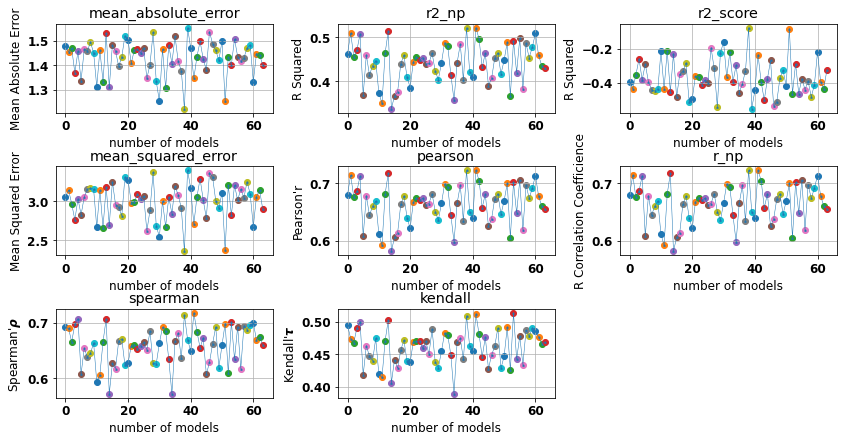

In [5]:
# Plot 64 models correlation results

plt.clf()
plt.figure(figsize=(14,20))
plot_index=1
pearson_r = []
mse = []
for c in condition_list:
    plt.subplot(len(condition_list), 3, plot_index)
    data = []
    for i in range(64):
        model_key = 'model'+str(i)
        y = original_data[model_key]
        pred = predict_data[model_key]
        y_ = np.array(y) 
        pred_ = np.array(pred)
        correlation = locals()[c](y_, pred_)
        if 'pearson' in c or 'spearman' in c or 'kendall' in c:
            correlation = correlation[0]
        if 'pearson' in c:
            pearson_r.append(correlation)
        if 'mean_squared_error' in c:
            mse.append(correlation)
        data.append(correlation)
        plt.scatter(i, correlation)
    plt.plot(data,'-^', lw = 0.5,markersize=1.5)
    plt.title(c)
    plt.ylabel(y_axis_labels[c])
    plt.grid(axis='y',alpha=0.9)
    plt.grid(axis='x',alpha=0.9)
    plt.xlabel('number of models')
    plot_index+=1
plt.subplots_adjust(hspace=0.6)
plt.subplots_adjust(wspace=0.3)
plt.show()

In [6]:
import pandas as pd
nmodels = 64
nrepeat = 100 # number of bootstrapping runs 

df = pd.DataFrame(range(1,1+nmodels),columns=["nmodel"])  # create dataframe to store all information 
for irepeat in range(1,1+nrepeat):
    ave_R2 = [] 
    np.random.seed(irepeat)
    select_nums = np.random.choice(nmodels,nmodels)
    select_data = [pearson_r[s] for s in select_nums]
    for num in range(1, nmodels+1): # how many models were chose for averaging R2
        ave_R2.append(np.mean(select_data[:num]))

    df[irepeat]=ave_R2
df_x = df['nmodel']
del df['nmodel']
df['ave'] = df.mean(axis=1)
df['std'] = df.std(axis=1)
difference=[]
for i in range(0,len(df['std'])-1):
    difference.append(df['std'][i]-df['std'][i+1])
for i in range(0,nmodels-len(difference)): # fill 0 to match datasize
    difference.append(0)
df['diff']=difference
#print (df)

[0.006782964038291657, 0.0049497252040521175, 0.003419004310121189, 0.0021908013564988747, 0.0012651163431852148, 0.0007096780597504754, 0.0005322981767453688, 0.000491955424662802, 0.0005189522702149386, 0.0006110578299026309, 0.000584938840037694, 0.0005451244406068159, 0.0003602055821377223, 0.000379146877404566, 0.0003659587362926601, 0.0002444589410590262, 0.0001557654823360361, 0.00019900397236116783, 0.00020564001289500623, 0.00021352505028774445, 0.00021642764712211625, 0.00020709787950769568, 0.00025257219159175587, 0.00033274804437599496, 0.0002725243839864864, 0.0001975227796940848, 8.608637652337148e-05, 2.9509527371748313e-05, 3.3119634874995314e-05, 2.1944175278631323e-05, 8.30465370281171e-05, 0.00011544992542475083, 0.00013789464375549114, 0.00015591795143751665, 0.00010656089800878659, 7.44676311297118e-05, 3.4578356816236666e-05, 1.3587810629508631e-05, 1.3626549568567826e-05, 3.808037482490572e-05, 5.6622683338477045e-05, 5.616273177304863e-05, 2.8519298297790402e-05

<Figure size 432x288 with 0 Axes>

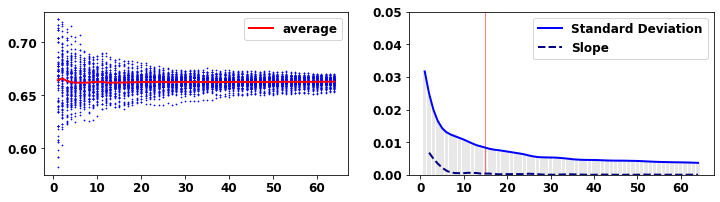

In [7]:
nrow=1
ncol=2
linewidth=0.2
maxylim=8
plt.clf()
fig, (ax1, ax2) = plt.subplots(nrow, ncol,figsize=(12,3))
fig.subplots_adjust(hspace=2)

# plot raw data
for i in range(1,1+nrepeat):
    ax1.scatter(df_x,df[i],lw=linewidth, label='', color='blue', s = 2)
ax1.plot(df_x,df['ave'],lw=linewidth*10, label='average', color='red')


#ax1.set_xlabel('Number of Models')
#ax1.set_ylabel('Pearson R')
ax1.legend(loc='upper right')
#ax1.set_title('Bootstrapping')

from scipy.signal import savgol_filter

ydata = savgol_filter(df['std'], 11, 3)
line1 = ax2.plot(df_x, ydata, lw=2, color = 'blue',label='Standard Deviation')
ax2.bar(df_x,df['std'], lw=2,  color='lightgrey',alpha = 0.5)
#ax2.set_xlabel('Number of Models')


ax2.set_ylim(0,0.05)

#ax3=ax2.twinx()

dx = 1
dy = [-n for n in np.diff(savgol_filter(df['std'], 11, 3))]
#line2 = ax3.plot(df_x[1:],dy,'--', lw=2, label='Slope', color='navy')
line2 = ax2.plot(df_x[1:],dy,'--', lw=2, label='Slope', color='navy')


#ax3.plot([32 for a in range(2)], [-1,1],lw=1, color='red')
#ax3.set_ylabel('Changes in slope')
#ax3.set_ylim(0,0.05)

print (dy)
threshold = 0.0003
for i in range(len(dy)):
    if dy[i] < threshold:
        index = i 
        print (index)
        break
#ax3.vlines(index, 0, 0.05, color = 'red', lw = 0.5)
ax2.vlines(index, 0, 0.05, color = 'red', lw = 0.5)



lns = line1+line2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='upper right')


In [8]:
df = pd.DataFrame(range(1,1+nmodels),columns=["nmodel"])  # create dataframe to store all information 
for irepeat in range(1,1+nrepeat):
    ave_R2 = [] 
    np.random.seed(irepeat)
    select_nums = np.random.choice(nmodels,nmodels)
    select_data = [mse[s] for s in select_nums]
    for num in range(1, nmodels+1): # how many models were chose for averaging R2
        ave_R2.append(np.mean(select_data[:num]))

    df[irepeat]=ave_R2
df_x = df['nmodel']
del df['nmodel']
df['ave'] = df.mean(axis=1)
df['std'] = df.std(axis=1)
difference=[]
for i in range(0,len(df['std'])-1):
    difference.append(df['std'][i]-df['std'][i+1])
for i in range(0,nmodels-len(difference)): # fill 0 to match datasize
    difference.append(0)
df['diff']=difference

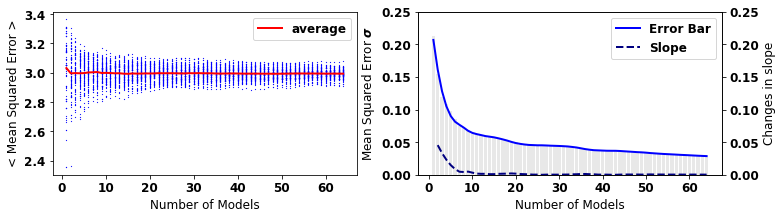

In [9]:
nrow=1
ncol=2
figheight=5
figwidth=12
linewidth=0.2
maxylim=8

fig, (ax1, ax2) = plt.subplots(nrow, ncol,figsize=(12,3))
#fig.subplots_adjust(hspace=1.5)

# plot raw data
for i in range(1,1+nrepeat):
    ax1.scatter(df_x,df[i],lw=linewidth, label='', color='blue', s = 1)
ax1.plot(df_x,df['ave'],lw=linewidth*10, label='average', color='red')

#ax1.fill_between(df_x, df['ave']-df['std'], df['ave']+df['std'],facecolor='r',alpha=0.2)
#ax1.set_ylim(0.55,0.8)
ax1.set_xlabel('Number of Models')
ax1.set_ylabel('< Mean Squared Error >')
#ax1.grid(True)
ax1.legend(loc='upper right')
#ax1.set_title('Bootstrapping')

line1 = ax2.plot(df_x, savgol_filter(df['std'], 11, 3), lw=2, color = 'blue', label='Error Bar')

ax2.bar(df_x,df['std'],    lw=2, color='lightgrey',alpha = 0.5)
ax2.set_xlabel('Number of Models')
ax2.set_ylabel('Mean Squared Error '+r'$\sigma$')
#ax2.set_title('Uncertainty')
ax2.set_ylim(0,0.25)



ax3=ax2.twinx()

dx = 1
dy = [-n for n in np.diff(savgol_filter(df['std'], 11, 3))]
line2= ax3.plot(df_x[1:],dy,'--', lw=2, label='Slope', color='navy')
#ax3.plot([32 for a in range(2)], [-1,1],lw=1, color='red')
ax3.set_ylabel('Changes in slope')
ax3.set_ylim(0,0.25)

lns = line1+line2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc='upper right')
